### Set up environment

In [1]:
### UKCP18 30 mins
# 1 month of data 200101 - January, 2001
# 48 half hours * 30 days = 1440 time slices

### NIMROD 30 mins
# 1 day of data 20010106 - 6th January, 2001
# 48 half hours = 48 time slices

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def calculate_ccdf_wetvalues(precipitation_data, bins_i_want, filter_small_vals=False):
    hist, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    cdf = np.cumsum(hist * np.diff(bin_edges))
    
    # Calculate 1 - CDF for CCDF
    ccdf = 1 - cdf
    
    # Find the centre point of each bin for plotting
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    return cdf, ccdf, bin_centres, bin_edges[1:]

def plot_ccdf(axs,results,colors):
    for num, result in enumerate(results):
        axs.scatter(result[3], result[1] ,linewidth = 3,s=3, color = colors[num])
        axs.plot(result[3],result[1] ,linewidth = 2.5, color = colors[num])
        
# Function to filter patches based on included colors
def create_patches(included_colors):
    return [mpatches.Patch(color=color, label=label) 
            for color, label in labels_and_colors if color in included_colors]     

def calculate_ccdf_wetvalues(precipitation_data, bins_i_want, filter_small_vals=False):

    # Ensure last bin includes all values >= 35 mm
    bins_i_want = np.append(bins_i_want, [np.inf])  # Add an "infinity" bin

    # Compute histogram
    hist, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)

    # Compute cumulative distribution function (CDF)
    cdf = np.cumsum(hist * np.diff(bin_edges))

    # Compute complementary cumulative distribution function (CCDF)
    ccdf = 1 - cdf

    # Find bin centers (for plotting)
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # **Manually adjust the final bin center to be 35 mm**
    bin_centres[-1] = 35  # Last bin center is now fixed at 35 mm

    return cdf, ccdf, bin_centres, bin_edges[1:]

labels_and_colors = [
    ('black', 'CEH-GEAR (Hourly)'),
    ('darkorange', 'UKCP18 (Hourly)'),
    ('purple', 'UKCP18 (30 mins)'),
    ('green', 'NIMROD (30 mins)'),
    ('royalblue', 'NIMROD (Hourly)')]

In [3]:
season='wholeyear'

### Get model data for overlapping and not overlapping time periods

In [4]:
resolution = '2.2km_bng_masked'
ukcp18_hrly = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_hourly/ukcp18_hrly_{resolution}_GB_{season}_new.npy')

In [5]:
resolution = '2.2km_bng_masked'
ukcp18_hrly_jja = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_hourly/ukcp18_hrly_2001_2014_{resolution}_GB_jja.npy')

In [6]:
resolution = '2.2km_bng_masked'
ukcp18_30m = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_30mins/ukcp18_30m_{resolution}_GB_{season}.npy')

In [7]:
ukcp18_30m_wet = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_30mins/ukcp18_30m_2.2km_bng_masked_GB_wholeyear_newwetthreshold.npy')

In [8]:
resolution = '2.2km_regridded'
cehgear_jja = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/CEH-GEAR/cehgear_1990-2014_{resolution}_GB_jja.npy')

In [9]:
resolution = '2.2km_regridded'
cehgear = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/CEH-GEAR/cehgear_{resolution}_GB_{season}.npy')

In [10]:
resolution = "NIMROD_regridded_2.2km"
NIMROD_jja = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/NIMROD/NIMROD_2006_2019_{resolution}_jja_GB.npy')
NIMROD_jja = NIMROD_jja[NIMROD_jja <= 100]

In [17]:
resolution = "NIMROD_regridded_2.2km"
NIMROD_30m = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/NIMROD/nimrod_2.2km_bng_masked_GB_{season}.npy')
NIMROD_30m = NIMROD_30m[NIMROD_30m <= 100]

In [18]:
resolution = "NIMROD_regridded_2.2km"
NIMROD_30m2 = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/NIMROD/nimrod_2.2km_bng_masked_GB_{season}_newwetthreshold.npy')
NIMROD_30m2 = NIMROD_30m2[NIMROD_30m2 <= 100]

In [12]:
resolution = "NIMROD_regridded_2.2km"
NIMROD_1h = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/NIMROD/nimrod_1hr_2.2km_bng_masked_GB_{season}.npy')
NIMROD_1h = NIMROD_1h[NIMROD_1h <= 100]

## Calculate CDFs and CCDFs

## All

In [19]:
bins_i_want =  [0, 0.1, 2, 3, 7, 10,15, 21, 35]
ukcp18_hrly_results = calculate_ccdf_wetvalues(ukcp18_hrly,bins_i_want)
# ukcp18_hrly_results_jja = calculate_ccdf_wetvalues(ukcp18_hrly_jja,bins_i_want)
ukcp18_30m_results = calculate_ccdf_wetvalues(ukcp18_30m, bins_i_want)
ukcp18_30m_results2 = calculate_ccdf_wetvalues(ukcp18_30m_wet, bins_i_want)

cehgear_results  = calculate_ccdf_wetvalues(cehgear, bins_i_want)
# cehgear_results_jja  = calculate_ccdf_wetvalues(cehgear_jja, bins_i_want)

NIMROD_30m_results = calculate_ccdf_wetvalues(NIMROD_30m,bins_i_want)
NIMROD_30m_results2 = calculate_ccdf_wetvalues(NIMROD_30m2,bins_i_want)
# NIMROD_results_jja = calculate_ccdf_wetvalues(NIMROD_jja,bins_i_want)

NIMROD_1h_results = calculate_ccdf_wetvalues(NIMROD_1h,bins_i_want)

/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply


In [ ]:
# fig, ax = plt.subplots(figsize=(8,4))

# results = [ukcp18_hrly_results, ukcp18_hrly_results_jja]
# colors = ['darkorange', 'gold', 'purple', 'black',  'green', 'blue']
# plot_ccdf(ax, results, colors)

# patches = create_patches(['black', 'purple', 'darkorange', 'green'])
# ax.set_yscale('log')
# ax.set_title('CCDF - 2.2km - highest bin 50')
# ax.legend(handles=patches);
# ax.set_xlabel('Intensity (mm/hr))')


In [14]:
def plot_ccdf(axs,results,colors):
    for num, result in enumerate(results):
        if colors[num] in ['black', 'firebrick', 'darkgreen']:
            linestyle = 'dashed'
            linewidth=2
        else:
            linestyle = 'solid'
            linewidth=2.4
        axs.scatter(result[3], result[1] ,linewidth = linewidth, linestyle=linestyle,s=3, color = colors[num])
        axs.plot(result[3],result[1] ,linewidth = linewidth, color = colors[num], linestyle=linestyle,)

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

def create_patches(included_colors):
    dashed_colors = {'black', 'firebrick', 'darkgreen'}  # Colors that should be dashed
    patches = []

    for color, label in labels_and_colors:
        if color in included_colors:
            linestyle = 'dashed' if color in dashed_colors else 'solid'
            patch = mlines.Line2D([], [], color=color, linestyle=linestyle, linewidth=2, label=label)
            patches.append(patch)
    
    return patches

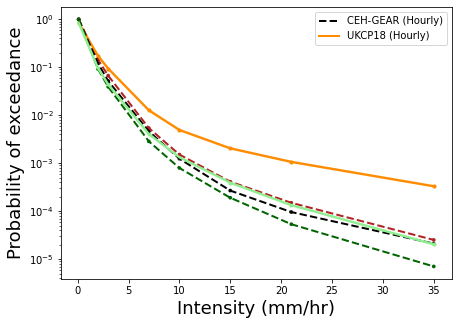

In [23]:
fig, ax = plt.subplots(figsize=(7,5))

results = [ukcp18_hrly_results, ukcp18_30m_results2, cehgear_results, NIMROD_1h_results, NIMROD_30m_results2]
colors = ['firebrick', 'darkorange', 'black',  'darkgreen', 'lightgreen']
plot_ccdf(ax, results, colors)

patches = create_patches(['black', 'firebrick', 'darkorange','darkgreen','lightgreen'])
ax.set_yscale('log')
ax.legend(handles=patches);
ax.set_xlabel('Intensity (mm/hr)', fontsize=18)
ax.set_ylabel('Probability of exceedance', fontsize=18)

patches = create_patches(['black', 'firebrick', 'darkorange','darkgreen','lightgreen'])
fig.savefig("../../FindIndependentRainfallEvents/AnalyseProfiles/Figs/model_evaluation.png", dpi=200, bbox_inches='tight') 

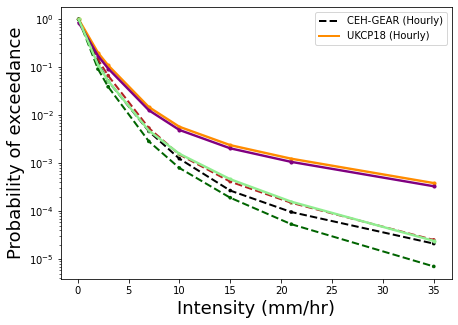

In [16]:
fig, ax = plt.subplots(figsize=(7,5))

results = [ukcp18_hrly_results, ukcp18_30m_results, ukcp18_30m_results2, cehgear_results, NIMROD_1h_results, NIMROD_30m_results, ]
colors = ['firebrick', 'darkorange', 'purple', 'black',  'darkgreen', 'lightgreen']
plot_ccdf(ax, results, colors)

patches = create_patches(['black', 'firebrick', 'darkorange','darkgreen','lightgreen'])
ax.set_yscale('log')
ax.legend(handles=patches);
ax.set_xlabel('Intensity (mm/hr)', fontsize=18)
ax.set_ylabel('Probability of exceedance', fontsize=18)

patches = create_patches(['black', 'firebrick', 'darkorange','darkgreen','lightgreen'])
fig.savefig("../../FindIndependentRainfallEvents/AnalyseProfiles/Figs/model_evaluation.png", dpi=200, bbox_inches='tight') 